# Machine Learning Foundation

## Course 5 Neurons as Logic gates

In this exercise we will experiment with neuron computations. We will show how to represent basic logic functions like AND, OR, and XOR using single neurons (or more complicated structures). Finally, at the end we will walk through how to represent neural networks as a chain of matrix computations.

In [ ]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Quickly define the sigmoid function

def sigmoid(x):
  return 1.0 / (1.0 + np.exp(-x))

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

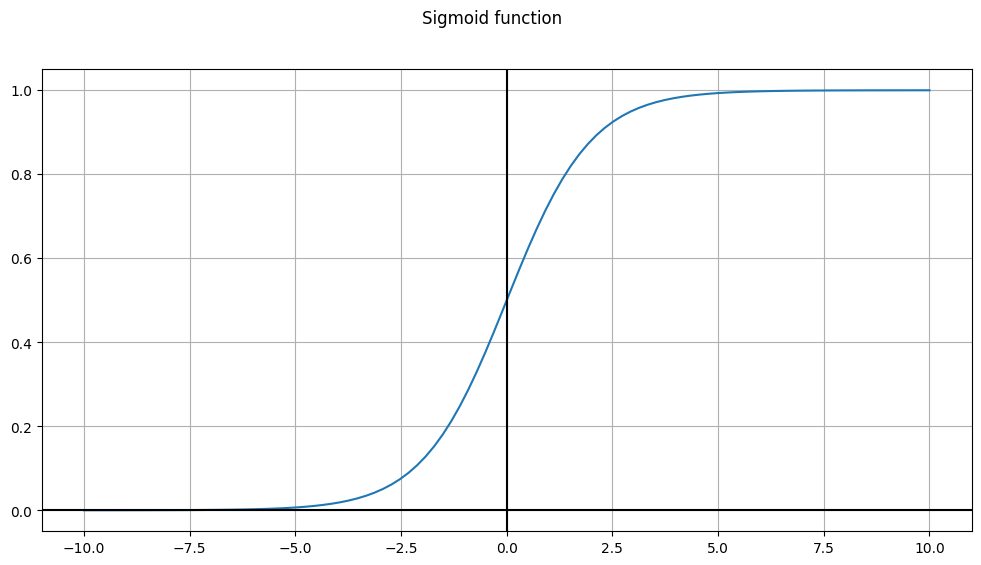

In [ ]:
# Plot the sigmoid function
vals = np.linspace(-10,10,num=100,dtype=np.float32)
activation = sigmoid(vals)
fig = plt.figure(figsize=(12,6))
fig.suptitle('Sigmoid function')
plt.plot(vals,activation)
plt.grid(True,which='both')
plt.axhline(y=0,color='k')
plt.axvline(x=0,color='k')
plt.yticks()
# plt.ylim([-0.5,1.5])

In [ ]:
def logic_gate(w1,w2,b):
  # Helper to create logic gate functions
  # Plug in values for weight_a , weight_b and bias
  return lambda x1 , x2 : sigmoid(w1*x1+w2*x2+b)
def test(gate):
    # Helper function to test out our weight functions.
    for a, b in (0, 0), (0, 1), (1, 0), (1, 1):
        print("{}, {}: {}".format(a, b, np.round(gate(a, b))))


In [ ]:
or_gate = logic_gate(20,20,-10)
test(or_gate)

0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 1.0


In [ ]:
w1 = 11
w2 = 10
b = -20
and_gate = logic_gate(w1, w2, b)
### END SOLUTION
test(and_gate)

0, 0: 0.0
0, 1: 0.0
1, 0: 0.0
1, 1: 1.0


In [ ]:
w1 = -20
w2 = -20
b = 10
nor_gate = logic_gate(w1, w2, b)
### END SOLUTION

test(nor_gate)

0, 0: 1.0
0, 1: 0.0
1, 0: 0.0
1, 1: 0.0


In [ ]:
### BEGIN SOLUTION
# TO DO: Fill in the w1, w2, and b parameters such that the
# truth table matches
w1 = -11
w2 = -10
b = 20
nand_gate = logic_gate(w1, w2, b)
### END SOLUTION

test(nand_gate)

0, 0: 1.0
0, 1: 1.0
1, 0: 1.0
1, 1: 0.0


In [ ]:
# Make sure we have or_gate, nand_gate and and_gate working from above

def xor_gate(a,b):
  c = or_gate(a,b)
  d = nand_gate(a,b)
  return and_gate(c,d)

test(xor_gate)

0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 0.0


In [ ]:
!pip install skillsnetwork

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.2 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [ ]:
import skillsnetwork
await skillsnetwork.prepare("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module1/L1/data/digits.csv",
                           overwrite=True)

Saved to '.'


In [ ]:
import pandas as pd
import numpy as np


digits = pd.read_csv('digits.csv')


In [ ]:
digits.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
labels = digits['label']
digits = np.array(digits.drop('label',axis=1)).astype('float')
digits.shape , labels.shape

((42000, 784), (42000,))

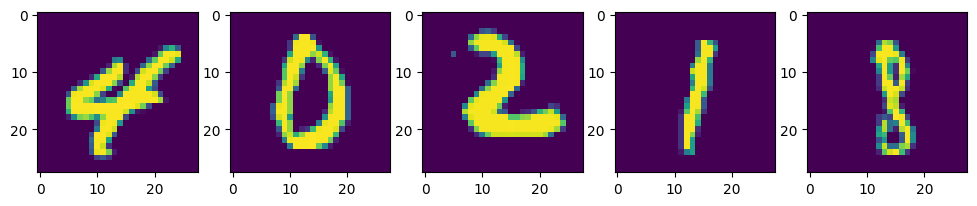

In [ ]:
import random
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(random.choice(digits).reshape(28,28))


In [ ]:
split = 0.7 , 0.3 # train , test

# Normalize data
digits /= 255.0
split_ind = int(len(digits)*split[0])
X_train, X_test, y_train, y_test = digits[:split_ind], digits[split_ind:], labels[:split_ind], labels[split_ind:]
X_train.shape , X_test.shape

((29399, 784), (12601, 784))

In [ ]:
# With scikit-learn's MLPClassifier, we can utilize the GridSearch cross validation method to optimize the following parameters:

# hidden_layer_sizes: tuple, length = n_layers - 2, default=(100,). The ith element represents the number of neurons in the ith hidden layer.

# alpha: float, default=0.0001. Strength of the L2 regularization term. The L2 regularization term is divided by the sample size when added to the loss.

# max_iter: int, default=200. Maximum number of iterations. The solver iterates until convergence (determined by ‘tol’) or this number of iterations. For stochastic solvers (‘sgd’, ‘adam’), note that this determines the number of epochs (how many times each data point will be used), not the number of gradient steps.

# learning_rate_init: float, default=0.001. The initial learning rate used. It controls the step-size in updating the weights. Only used when solver=’sgd’ or ‘adam’.

# We will use the default activation "relu" and default solver "adam".

In [ ]:
print('a8')

a8


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'hidden_layer_sizes' : [50,75,100],
              'alpha' : [0.0001,0.001,0.01,0.1],
              'max_iter' : [200,500,800],
              'learning_rate_init' : [0.0001,0.001,0.01,0.1]
            }

model = MLPClassifier()
clf = GridSearchCV(estimator=model,param_grid=parameters,cv=5,n_jobs=-1)
clf.fit(X_train[:200],y_train[:200])

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'hidden_layer_sizes': [50, 75, 100],
                         'learning_rate_init': [0.0001, 0.001, 0.01, 0.1],
                         'max_iter': [200, 500, 800]})

In [ ]:
print("The best parameter values found are:\n")
print(clf.best_params_)

# store the best model found in "bestmodel"
bestmodel = clf.best_estimator_

The best parameter values found are:

{'alpha': 0.001, 'hidden_layer_sizes': 50, 'learning_rate_init': 0.0001, 'max_iter': 500}


The accuracy score of the best model is 0.7721609396079676



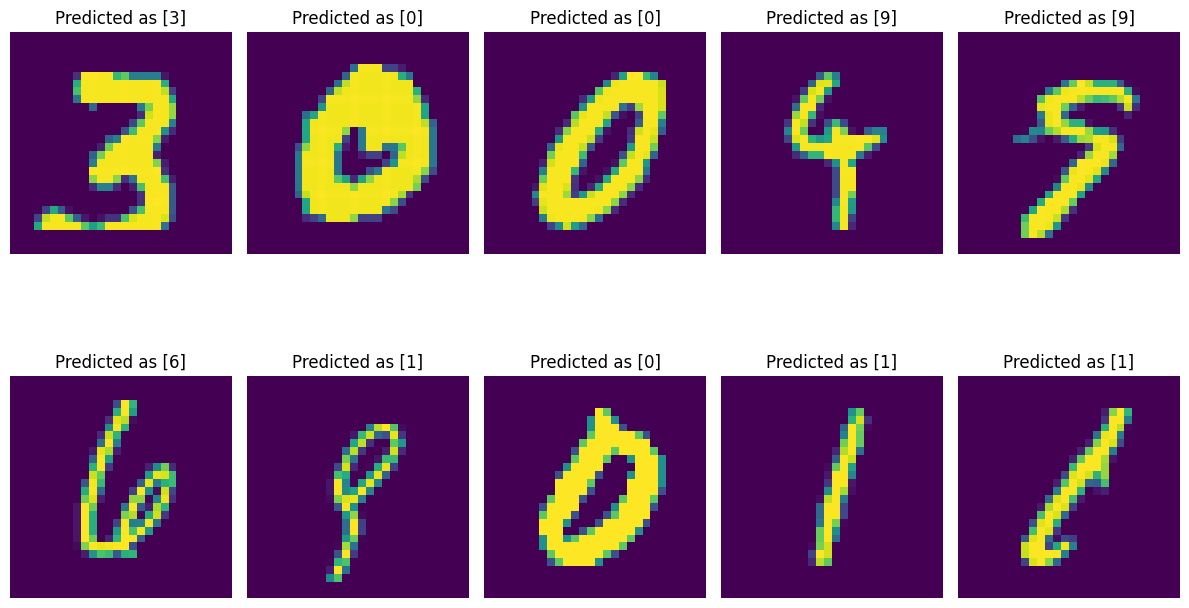

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = bestmodel.predict(X_test)
print(f"The accuracy score of the best model is {accuracy_score(y_test, y_pred)}\n")

plt.figure(figsize=(12,8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    sample = random.choice(X_test)
    plt.imshow(sample.reshape(28,28))
    pred = bestmodel.predict(sample.reshape(1,-1))
    plt.title(f"Predicted as {pred}")
    plt.axis("off")

plt.tight_layout()